In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max.columns', 100)
# to draw pictures in jupyter notebook
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')


In [59]:
data = pd.read_csv("C:/Users/VTsapiy/Desktop/лаба 2/adult.data.csv", names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'salary'], sep=', ')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [60]:
data['sex'].count()

32561

1. How many men and women (sex feature) are represented in this dataset?

In [74]:
data['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

2. What is the average age (age feature) of women?

In [75]:
data.loc[data['sex'] == 'Female', 'age'].mean()

36.85823043357163

3. What is the percentage of German citizens (native-country feature)?

In [77]:
float((data['native-country'] == 'Germany').sum()) / data.shape[0]

0.004207487485028101

4-5. What are the mean and standard deviation of age for those who earn more than 50K per year (salary feature) and those who earn less than 50K per year?

In [78]:
ages1 = data.loc[data['salary'] == '>50K', 'age']
ages2 = data.loc[data['salary'] == '<=50K', 'age']
print("The average age of the rich: {0} +- {1} years, poor - {2} +- {3} years.".format(
    round(ages1.mean()), round(ages1.std(), 1),
    round(ages2.mean()), round(ages2.std(), 1)))

The average age of the rich: 44.0 +- 10.5 years, poor - 37.0 +- 14.0 years.


6. Is it true that people who earn more than 50K have at least high school education? (education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters or Doctorate feature)

In [81]:
data.loc[data['salary'] == '>50K', 'education'].unique()

array(['HS-grad', 'Masters', 'Bachelors', 'Some-college', 'Assoc-voc',
       'Doctorate', 'Prof-school', 'Assoc-acdm', '7th-8th', '12th',
       '10th', '11th', '9th', '5th-6th', '1st-4th'], dtype=object)

7. Display age statistics for each race (race feature) and each gender (sex feature). Use groupby() and describe(). Find the maximum age of men of Amer-Indian-Eskimo race.

In [82]:
for (race, sex), sub_df in data.groupby(['race', 'sex']):
    print("Race: {0}, sex: {1}".format(race, sex))
    print(sub_df['age'].describe())

Race: Amer-Indian-Eskimo, sex: Female
count    119.000000
mean      37.117647
std       13.114991
min       17.000000
25%       27.000000
50%       36.000000
75%       46.000000
max       80.000000
Name: age, dtype: float64
Race: Amer-Indian-Eskimo, sex: Male
count    192.000000
mean      37.208333
std       12.049563
min       17.000000
25%       28.000000
50%       35.000000
75%       45.000000
max       82.000000
Name: age, dtype: float64
Race: Asian-Pac-Islander, sex: Female
count    346.000000
mean      35.089595
std       12.300845
min       17.000000
25%       25.000000
50%       33.000000
75%       43.750000
max       75.000000
Name: age, dtype: float64
Race: Asian-Pac-Islander, sex: Male
count    693.000000
mean      39.073593
std       12.883944
min       18.000000
25%       29.000000
50%       37.000000
75%       46.000000
max       90.000000
Name: age, dtype: float64
Race: Black, sex: Female
count    1555.000000
mean       37.854019
std        12.637197
min        17.000000

8. Among whom is the proportion of those who earn a lot (>50K) greater: married or single men (marital-status feature)? Consider as married those who have a marital-status starting with Married (Married-civ-spouse, Married-spouse-absent or Married-AF-spouse), the rest are considered bachelors.

In [83]:
data.loc[(data['sex'] == 'Male') &
     (data['marital-status'].isin(['Never-married', 
                                   'Separated', 
                                   'Divorced',
                                   'Widowed'])), 'salary'].value_counts()

<=50K    7552
>50K      697
Name: salary, dtype: int64

In [84]:
data.loc[(data['sex'] == 'Male') &
     (data['marital-status'].str.startswith('Married')), 'salary'].value_counts()

<=50K    7576
>50K     5965
Name: salary, dtype: int64

In [85]:
data['marital-status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64

9. What is the maximum number of hours a person works per week (hours-per-week feature)? How many people work such a number of hours, and what is the percentage of those who earn a lot (>50K) among them?

In [86]:
max_load = data['hours-per-week'].max()
print("Max time - {0} hours./week.".format(max_load))

num_workaholics = data[data['hours-per-week'] == max_load].shape[0]
print("Total number of such hard workers {0}".format(num_workaholics))

rich_share = float(data[(data['hours-per-week'] == max_load)
                 & (data['salary'] == '>50K')].shape[0]) / num_workaholics
print("Percentage of rich among them {0}%".format(int(100 * rich_share)))

Max time - 99 hours./week.
Total number of such hard workers 85
Percentage of rich among them 29%


10. Count the average time of work (hours-per-week) for those who earn a little and a lot (salary) for each country (native-country). What will these be for Japan?

In [87]:
for (country, salary), sub_df in data.groupby(['native-country', 'salary']):
    print(country, salary, round(sub_df['hours-per-week'].mean(), 2))

? <=50K 40.16
? >50K 45.55
Cambodia <=50K 41.42
Cambodia >50K 40.0
Canada <=50K 37.91
Canada >50K 45.64
China <=50K 37.38
China >50K 38.9
Columbia <=50K 38.68
Columbia >50K 50.0
Cuba <=50K 37.99
Cuba >50K 42.44
Dominican-Republic <=50K 42.34
Dominican-Republic >50K 47.0
Ecuador <=50K 38.04
Ecuador >50K 48.75
El-Salvador <=50K 36.03
El-Salvador >50K 45.0
England <=50K 40.48
England >50K 44.53
France <=50K 41.06
France >50K 50.75
Germany <=50K 39.14
Germany >50K 44.98
Greece <=50K 41.81
Greece >50K 50.62
Guatemala <=50K 39.36
Guatemala >50K 36.67
Haiti <=50K 36.33
Haiti >50K 42.75
Holand-Netherlands <=50K 40.0
Honduras <=50K 34.33
Honduras >50K 60.0
Hong <=50K 39.14
Hong >50K 45.0
Hungary <=50K 31.3
Hungary >50K 50.0
India <=50K 38.23
India >50K 46.48
Iran <=50K 41.44
Iran >50K 47.5
Ireland <=50K 40.95
Ireland >50K 48.0
Italy <=50K 39.62
Italy >50K 45.4
Jamaica <=50K 38.24
Jamaica >50K 41.1
Japan <=50K 41.0
Japan >50K 47.96
Laos <=50K 40.38
Laos >50K 40.0
Mexico <=50K 40.0
Mexico >50K 46

In [88]:
pd.crosstab(data['native-country'], data['salary'], 
           values=data['hours-per-week'], aggfunc=np.mean).T

native-country,?,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,Germany,Greece,Guatemala,Haiti,Holand-Netherlands,Honduras,Hong,Hungary,India,Iran,Ireland,Italy,Jamaica,Japan,Laos,Mexico,Nicaragua,Outlying-US(Guam-USVI-etc),Peru,Philippines,Poland,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
salary,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
<=50K,40.164760,41.416667,37.914634,37.381818,38.684211,37.985714,42.338235,38.041667,36.030928,40.483333,41.058824,39.139785,41.809524,39.360656,36.325,40.0,34.333333,39.142857,31.3,38.233333,41.44,40.947368,39.625,38.239437,41.000000,40.375,40.003279,36.09375,41.857143,35.068966,38.065693,38.166667,41.939394,38.470588,39.444444,40.15625,33.774194,42.866667,37.058824,38.799127,37.193548,41.6
>50K,45.547945,40.000000,45.641026,38.900000,50.000000,42.440000,47.000000,48.750000,45.000000,44.533333,50.750000,44.977273,50.625000,36.666667,42.750,NaN,60.000000,45.000000,50.0,46.475000,47.50,48.000000,45.400,41.100000,47.958333,40.000,46.575758,37.50000,NaN,40.000000,43.032787,39.000000,41.500000,39.416667,46.666667,51.43750,46.800000,58.333333,40.000000,45.505369,39.200000,49.5


2 часть

In [97]:
import timeit

In [92]:
user_usage = pd.read_csv('C:/Users/VTsapiy/Desktop/лаба 2/user_usage.csv')
user_usage.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
0,21.97,4.82,1557.33,22787
1,1710.08,136.88,7267.55,22788
2,1710.08,136.88,7267.55,22789
3,94.46,35.17,519.12,22790
4,71.59,79.26,1557.33,22792


In [93]:
user_device = pd.read_csv('C:/Users/VTsapiy/Desktop/лаба 2/user_device.csv')
user_device.head()

,use_id,user_id,platform,platform_version,device,use_type_id
0,22782,26980,ios,10.2,"iPhone7,2",2
1,22783,29628,android,6.0,Nexus 5,3
2,22784,28473,android,5.1,SM-G903F,1
3,22785,15200,ios,10.2,"iPhone7,2",3
4,22786,28239,android,6.0,ONE E1003,1


In [99]:
devices = pd.read_csv('C:/Users/VTsapiy/Desktop/лаба 2/android_devices.csv')
devices.head()

,Retail Branding,Marketing Name,Device,Model
0,NaN,NaN,AD681H,Smartfren Andromax AD681H
1,NaN,NaN,FJL21,FJL21
2,NaN,NaN,T31,Panasonic T31
3,NaN,NaN,hws7721g,MediaPad 7 Youth 2
4,3Q,OC1020A,OC1020A,OC1020A


Запрос на соединение двух наборов данных в pandas

In [237]:
result = pd.merge(user_usage,
                 user_device[['use_id', 'platform', 'device']],
                 on='use_id')
result.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F


In [200]:
%timeit result

60.3 ns ± 3.2 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


Запрос на группировку набора данных с использованием функций агрегирования в pandas

In [108]:
user_usage.groupby('use_id', as_index=False).agg({"outgoing_sms_per_month": "sum"})

,use_id,outgoing_sms_per_month
0,22787,4.82
1,22788,136.88
2,22789,136.88
3,22790,35.17
4,22792,79.26
...,...,...
235,25008,68.44
236,25040,36.50
237,25046,12.37
238,25058,120.46


In [203]:
result_2 = user_usage.groupby('use_id', as_index=False).agg({"outgoing_sms_per_month": "sum"})

In [ ]:
%timeit result_2

Запрос на соединение двух наборов данных в pandaSQL

In [110]:
import pandasql as ps

In [188]:
query_pandasql = '''
    SELECT u.use_id,
           u.monthly_mb,
           u.outgoing_sms_per_month,
           u2.device
    FROM   user_usage u
    LEFT JOIN
           user_device u2
            ON u.use_id = u2.use_id
    '''
pandasql_1 = ps.sqldf(query_pandasql, locals())

In [189]:
pandasql_1

,use_id,monthly_mb,outgoing_sms_per_month,device
0,22787,1557.33,4.82,GT-I9505
1,22788,7267.55,136.88,SM-G930F
2,22789,7267.55,136.88,SM-G930F
3,22790,519.12,35.17,D2303
4,22792,1557.33,79.26,SM-G361F
...,...,...,...,...
235,25008,896.96,68.44,None
236,25040,2815.00,36.50,None
237,25046,6828.09,12.37,None
238,25058,1453.16,120.46,None


In [193]:
worktime_3 = %timeit pandasql_1

61.1 ns ± 2.9 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


Запрос на группировку набора данных с использованием функций агрегирования в PandaSQL

In [178]:
query_pandasql_agg = '''
    SELECT 
           u2.device,
           sum(u.outgoing_sms_per_month) total_outgoing_sms_per_month,
           avg(u.outgoing_mins_per_month) total_outgoing_mins_per_month
    FROM   user_usage u
    LEFT JOIN
           user_device u2
               ON u.use_id = u2.use_id
    GROUP BY
           u2.device
    ORDER BY 2 DESC

    '''
pandasql_2 = ps.sqldf(query_pandasql_agg, locals())

In [263]:
pandasql_2.head()

,device,total_outgoing_sms_per_month,total_outgoing_mins_per_month
0,None,9763.77,414.376420
1,SM-G900F,2479.94,178.825333
2,GT-I9505,1076.33,162.770909
3,HTC One mini 2,981.99,78.800000
4,SM-G935F,891.46,325.834000


In [199]:
worktime_4 = %timeit pandasql_2

59.6 ns ± 1.79 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


Сравнение времени выполенния запроса pandas и pandasql на соединение таблиц

pandas = 60.3 ns ± 3.2 ns

pandasql = 61.1 ns ± 2.9 ns

Сравнение времени выполенния запроса pandas и pandasql на выполенение запросов с аггрегированными данными

pandas = 3.31 ms ± 461 µs

pandasql = 59.6 ns ± 1.79 ns

In [272]:
# pandasql code
def query_merge_pandasql(user_usage, user_device):
    simple_query_merge = '''
    SELECT 
           u2.device,
           sum(u.outgoing_sms_per_month) total_outgoing_sms_per_month,
           avg(u.outgoing_mins_per_month) total_outgoing_mins_per_month
    FROM   user_usage u
    LEFT JOIN
           user_device u2
               ON u.use_id = u2.use_id
    GROUP BY
           u2.device
    ORDER BY 2 DESC

    '''
    return ps.sqldf(simple_query_merge, locals())

# pandas code
def query_merge_pandas(user_usage, user_device):
    return pd.merge(user_usage,
                 user_device[['use_id', 'platform', 'device']],
                 on='use_id')

In [274]:
merge_times = []
for count in range(1000, 137000, 1000):
    pandasql_time = count_mean_time(query_merge_pandasql, [user_usage[:count], user_device])
    pandas_time = count_mean_time(query_merge_pandas, [user_usage[:count], user_device])
    merge_times.append({'count': count, 'pandasql_time': pandasql_time, 'pandas_time': pandas_time})

In [275]:
merge_times_df = pd.DataFrame(merge_times)
merge_times_df.columns = ['number of rows in user_usage', 'pandas time', 'pandasql time']
merge_times_df = merge_times_df.set_index('number of rows in user_usage')

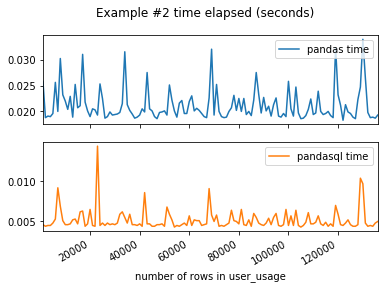

In [276]:
merge_plot = merge_times_df.plot(title = 'Example #2 time elapsed (seconds)', subplots = True)

In [265]:
#pandasql code
def query_pandasql(user_usage):
    aggr_query = '''
        SELECT 
            avg(outgoing_mins_per_month) as outgoing_mins_per_month,
            use_id
        FROM user_usage 
        GROUP BY use_id
        '''
    return ps.sqldf(aggr_query, locals()).set_index('use_id')

# pandas code
def query_pandas(user_usage):
    return pd.DataFrame(user_usage.groupby('use_id').outgoing_mins_per_month.mean())

In [266]:
import time

def count_mean_time(func, params, N =5):
    total_time = 0
    for i in range(N):
        time1 = time.time()
        if len(params) == 1:
            tmp_df = func(params[0])
        elif len(params) == 2:
            tmp_df = func(params[0], params[1])
        time2 = time.time()
        total_time += (time2 - time1)
    return total_time/N

In [268]:
agg_times = []
for count in range(1000, 137000, 1000):
    pandasql_time = count_mean_time(query_pandasql, [user_usage[:count]])
    pandas_time = count_mean_time(query_pandas, [user_usage[:count]])
    agg_times.append({'count': count, 'pandasql_time': pandasql_time, 'pandas_time': pandas_time})

In [270]:
agg_times_df = pd.DataFrame(agg_times)
agg_times_df.columns = ['number of rows in user_usage', 'pandas time', 'pandasql time']
agg_times_df = agg_times_df.set_index('number of rows in user_usage')

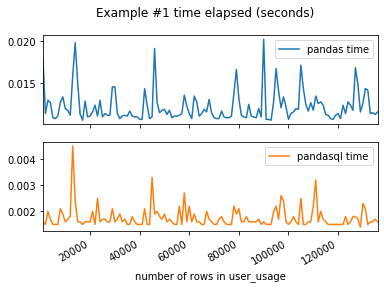

In [271]:
agg_plot = agg_times_df.plot(title = 'Example #1 time elapsed (seconds)', subplots = True)